# Assignment 2 - Elementary Probability and Information Theory 
# Boise State University DL - Dr. Kennington

### Instructions and Hints:

* This notebook loads some data into a `pandas` dataframe, then does a small amount of preprocessing. Make sure your data can load by stepping through all of the cells up until question 1. 
* Most of the questions require you to write some code. In many cases, you will write some kind of probability function like we did in class using the data. 
* Some of the questions only require you to write answers, so be sure to change the cell type to markdown or raw text
* Don't worry about normalizing the text this time (e.g., lowercase, etc.). Just focus on probabilies. 
* Most questions can be answered in a single cell, but you can make as many additional cells as you need. 
* When complete, please export as HTML. Follow the instructions on the corresponding assignment Trello card for submitting your assignment. 

In [1]:
import pandas as pd 

data = pd.read_csv('data/pnp-train.txt',delimiter='\t',encoding='latin-1', # utf8 encoding didn't work for this
                  names=['type','name']) # supply the column names for the dataframe

# this next line creates a new column with the lower-cased first word
data['first_word'] = data['name'].map(lambda x: x.lower().split()[0])

In [2]:
data[:10]

,type,name,first_word
0,drug,Dilotab,dilotab
1,movie,Beastie Boys: Live in Glasgow,beastie
2,person,Michelle Ford-Eriksson,michelle
3,place,Ramsbury,ramsbury
4,place,Market Bosworth,market
5,drug,Cyanide Antidote Package,cyanide
6,person,Bill Johnson,bill
7,place,Ettalong,ettalong
8,movie,The Suicide Club,the
9,place,Pézenas,pézenas


In [3]:
data.describe()

,type,name,first_word
count,21001,21001,21001
unique,5,20992,13703
top,movie,Valentine,the
freq,6262,2,635


## 1. Write a probability function/distribution $P(T)$ over the types. 

Hints:

* The Counter library might be useful: `from collections import Counter`
* Write a function `def P(T='')` that returns the probability of the specific value for T
* You can access the types from the dataframe by calling `data['type']`

In [4]:
from collections import Counter
data_types = data['type'].values
length_type = len(data_types)
stats_type = Counter(data_types)
def P(T=''):
    return stats_type[T] / length_type

## 2. What is `P(T='movie')` ?

In [5]:
P('movie')

0.29817627732012764

## 3. Show that your probability distribution sums to one.

In [6]:
import numpy as np

np.sum([P(x) for x in stats_type.keys()])

1.0

## 4. Write a joint distribution using the type and the first word of the name

Hints:

* The function is $P2(T,W_1)$
* You will need to count up types AND the first words, for example: ('person','bill)
* Using the zip function was useful for me here

In [7]:
W1 = data['first_word'].values
type_firstWord = list(zip(data_types, W1))
length_joint_dist = len(type_firstWord)
stats_joint_dist = Counter(type_firstWord)
def P2(T='', W1=''):
    return stats_joint_dist[(T, W1)] / length_joint_dist

## 5. What is P2(T='person', W1='bill')? What about P2(T='movie',W1='the')?

In [8]:
P2('person', 'bill')

0.00047616780153326033

In [9]:
P2('movie', 'the')

0.02747488214846912

## 6. Show that your probability distribution P(T,W1) sums to one.

In [10]:
np.sum([P2(type_word[0], type_word[1]) for type_word in stats_joint_dist.keys()])

1.0

## 7. Make a new function Q(T) from marginalizing over P(T,W1) and make sure that Q(T) sums to one.

Hints:

* Your Q function will call P(T,W1)
* Your check for the sum to one should be the same answer as Question 3, only it calls Q instead of P.

In [11]:
def Q(T='movie'):
    return np.sum([P2(type_word[0], type_word[1]) for type_word in stats_joint_dist.keys() if type_word[0] == T])

In [12]:
Q('movie')

0.29817627732012769

In [13]:
np.sum([Q(types) for types in stats_type.keys()])

1.0

## 8. What is the KL Divergence of your Q function and your P function for Question 1?

* Even if you know the answer, you still need to write code that computes it.

In [14]:
np.sum([-P(types) * np.log10(Q(types) / P(types)) for types in stats_type.keys()])

-8.5573099693762471e-17

## 9. Convert from P(T,W1) to P(W1|T) 

Hints:

* Just write a comment cell, no code this time. 
* Note that $P(T,W1) = P(W1,T)$

## $P(W_1|T) = \frac{P(W_1,T)}{P(T)}$

## 10. Write a function `Pwt` (that calls the functions you already have) to compute $P(W_1|T)$.

* This will be something like the multiplication rule, but you may need to change something

In [15]:
def Pwt(W1='', T=''):
    return P2(T, W1)/P(T)

## 11. What is P(W1='the'|T='movie')?

In [16]:
Pwt('the', 'movie')

0.09214308527626956

## 12. Use Baye's rule to convert from P(W1|T) to P(T|W1). Write a function Ptw to reflect this. 

Hints:

* Call your other functions.
* You may need to write a function for P(W1) and you may need a new counter for `data['first_word']`

In [17]:
data_W1 = data['first_word'].values
length_W1 = len(data_W1)
stats_W1 = Counter(data_W1)

def Pw(W1=''):
    return stats_W1[W1] / length_W1
    
def Ptw(W1='', T=''):
    return Pwt(W1, T) * P(T) / Pw(W1)

## 13 
### What is P(T='movie'|W1='the')? 
### What about P(T='person'|W1='the')?
### What about P(T='drug'|W1='the')?
### What about P(T='place'|W1='the')
### What about P(T='company'|W1='the')

In [18]:
Ptw('the', 'movie')

0.9086614173228347

In [19]:
Ptw('the', 'person')

0.0

In [20]:
Ptw('the', 'drug')

0.0

In [21]:
Ptw('the', 'place')

0.0015748031496062992

In [22]:
Ptw('the', 'company')

0.08976377952755905

## 14 Given this, if the word 'the' is found in a name, what is the most likely type?

**Movie**

## 15. Is Ptw(T='movie'|W1='the') the same as Pwt(W1='the'|T='movie') the same? Why or why not?

In [23]:
Ptw('the', 'movie')

0.9086614173228347

In [24]:
Pwt('the', 'movie')

0.09214308527626956

No, because conditional distributions aren't communative.

## 16. Do you think modeling Ptw(T|W1) would be better with a continuous function like a Gaussian? Why or why not?

* Not really beacuse words are countable, disecrete things. But there are ways....

## 17. Determine the right probability distribution

* Load the `rivers.csv` file and print out a histogram
* Which disitrbutions do you think would fit the data for the `x` column? Here is a list: https://en.wikipedia.org/wiki/Category:Continuous_distributions
* Hint: look at some of the exponential distributions, and maybe the Pareto
* Use the principle of Maximum Entropy to detemrine which of the two distributions would best fit your data (you can sum over all values in your data)
* You will need to estimate the parameters needed for each distribution (you may need to write maximum likelihood estimation functions for estimating your parameters)
* You can use built-in python functions to model the distribution, if they exist. Otherwise, you may need to write your own
* Show the Maximum Entropy calculations. 
* Calculate the KL divergence on the two distributions
* make nice markdown commments so I know where everything is

In [25]:
%matplotlib inline  

import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('data/rivers.csv') 

In [27]:
data.describe()

,Unnamed: 0,x
count,141.000000,141.000000
mean,71.000000,591.184397
std,40.847277,493.870842
min,1.000000,135.000000
25%,36.000000,310.000000
50%,71.000000,425.000000
75%,106.000000,680.000000
max,141.000000,3710.000000


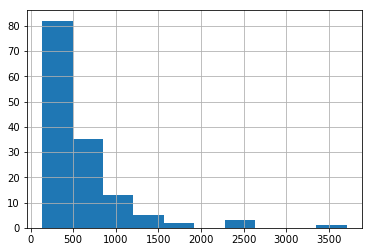

In [28]:
data.x.hist()

Get the data of the column "x"

In [29]:
X = data['x']

Based on the histogram plot, the Exponential distribution seems good fitting into the data. And we also choose Gaussian distribution for comparison (the one that is not very close to this histogram).

In order to estimate the parameters of these two distribution, we use the maximum likelihood estimation (MLE).
- For the Gaussian distribution, $N \sim (\mu, \sigma^2)$, we need to estimate the mean and standard deviation. And the MLE solution of the Gaussian distribution is: $\hat{\mu} = \frac{1}{N}\sum_{n=1}^{N}{x_n}$; $\hat{\sigma}^2 = \frac{1}{N}\sum_{n=1}^{N}{(x_n - \hat{\mu})^2}$
- For the Exponential distribution, $E \sim (\lambda)$, we need to estimate the parameter $\lambda$, which is estimated by MLE as: $\hat{\lambda} = \frac{N}{\sum_{n=1}^{N}{x_n}}$. This is the same as the reciprocal of the sample mean.

Compute the estimation of parameters of the selected distributions.

In [30]:
X_mean = np.mean(X)
X_std = np.std(X)
X_lambda = 1 / X_mean

After getting these parameters, we want to compare the Entropy of fitted distributions.

Using `scipy.stats` distribution functions to compute the values of the probability density functions.

In [31]:
from scipy.stats import norm
from scipy.stats import expon
norm_pdf = norm.pdf(X, X_mean, X_std)
expon_pdf = expon.pdf(X, loc=0, scale = 1 / X_lambda)

Define a function to compute entropy:
$$H(p) = -\sum_{n=1}^{N}{P(X_n)log(P(X_n))}$$

In [32]:
def entropy(pdf):
    return -np.sum([p * np.log(p) for p in pdf])

Entropy of the Gassian distribution

In [33]:
entropy(norm_pdf)

0.6817146718970013

Entropy of the Exponential distribution

In [34]:
entropy(expon_pdf)

0.75034777381086548

From the values of entropy, we can see that the exponential distribution has a better fit.

Calculate the KL divergence

$$D_{KL}(P || Q) = \sum_{n=1}^{N}{P(X_n)log(\frac{P(X_n)}{Q(X_n)})}$$

In [35]:
np.sum(-np.multiply(norm_pdf, np.log(np.divide(norm_pdf, expon_pdf))))

0.0044275769629730493

We can see that the value is close to 0, which means these two fitted distribution are close to each other.

We can plot it.
- sort the values of X for plot.

In [36]:
sortedIndex = np.argsort(X)

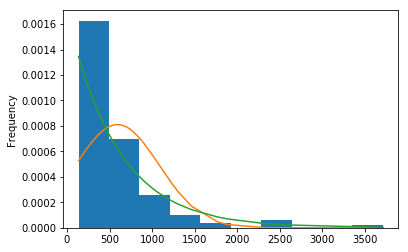

In [37]:
data.x.plot(kind='hist', normed=True)

plt.plot(X[sortedIndex], norm_pdf[sortedIndex])
plt.plot(X[sortedIndex], expon_pdf[sortedIndex])